In [1]:
import json
import math
import pickle
import numpy as np
import pandas as pd
import scipy
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from matplotlib.gridspec import GridSpec

## Hit ratio of atoms in reaction sites

In [2]:
weights = list(json.load(open('./Data/chem_att_mapping_attention.json')).values())
df1 = pd.DataFrame({"Model": ["Att"]*len(weights), "Weights": weights})

weights_random = np.load("./Data/chem_att_mapping_random_values.npy")
df2 = pd.DataFrame({"Model": ["Random"]*len(weights_random), "Weights": weights_random})

wdf = pd.concat([df1, df2], ignore_index=True)     
wdf.reset_index()

wdf.head()

,Model,Weights
0,Att,0.200000
1,Att,0.800000
2,Att,0.800000
3,Att,0.666667
4,Att,0.666667


## Single-site mutation 

In [3]:
df1 = pd.DataFrame({"Group": ["Cont"]*3, "Results": [94.09, 95.08, 98.91 ] })
df2 = pd.DataFrame({"Group": ["255"]*3, "Results": [39.18, 44.76, 65.00 ] })
df3 = pd.DataFrame({"Group": ["348"]*3, "Results": [5.87, 6.69, 9.00 ] })
df4 = pd.DataFrame({"Group": ["101"]*3, "Results": [13.91, 15.86, 23.00 ] })
df5 = pd.DataFrame({"Group": ["169"]*3, "Results": [14.67, 23.51, 18.00 ] })

df = pd.concat([df1,  df2, df3, df4, df5], ignore_index=True)   
df.reset_index()
df.head()

,Group,Results
0,Cont,94.09
1,Cont,95.08
2,Cont,98.91
3,255,39.18
4,255,44.76


In [4]:
df1 = pd.DataFrame({"Group": ["Cont"]*3, "Results": [83.69, 79.52, 100.00]})
df2 = pd.DataFrame({"Group": ["134"]*3, "Results": [78.23, 85.61, 66.00  ] })
df3 = pd.DataFrame({"Group": ["32"]*3, "Results": [38.53, 44.51, 43.00 ] })
df4 = pd.DataFrame({"Group": ["12"]*3, "Results": [43.17, 40.44, 50.00 ] })
df5 = pd.DataFrame({"Group": ["21"]*3, "Results": [31.61, 28.29, 33.00 ] })

df_ = pd.concat([ df1, df2, df3, df4, df5], ignore_index=True)   
df_.reset_index()
df_.head()

,Group,Results
0,Cont,83.69
1,Cont,79.52
2,Cont,100.00
3,134,78.23
4,134,85.61


In [5]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return ""

<ipython-input-6-86526c8c97c8>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(gs[0, 0:1])
No handles with labels found to put in legend.


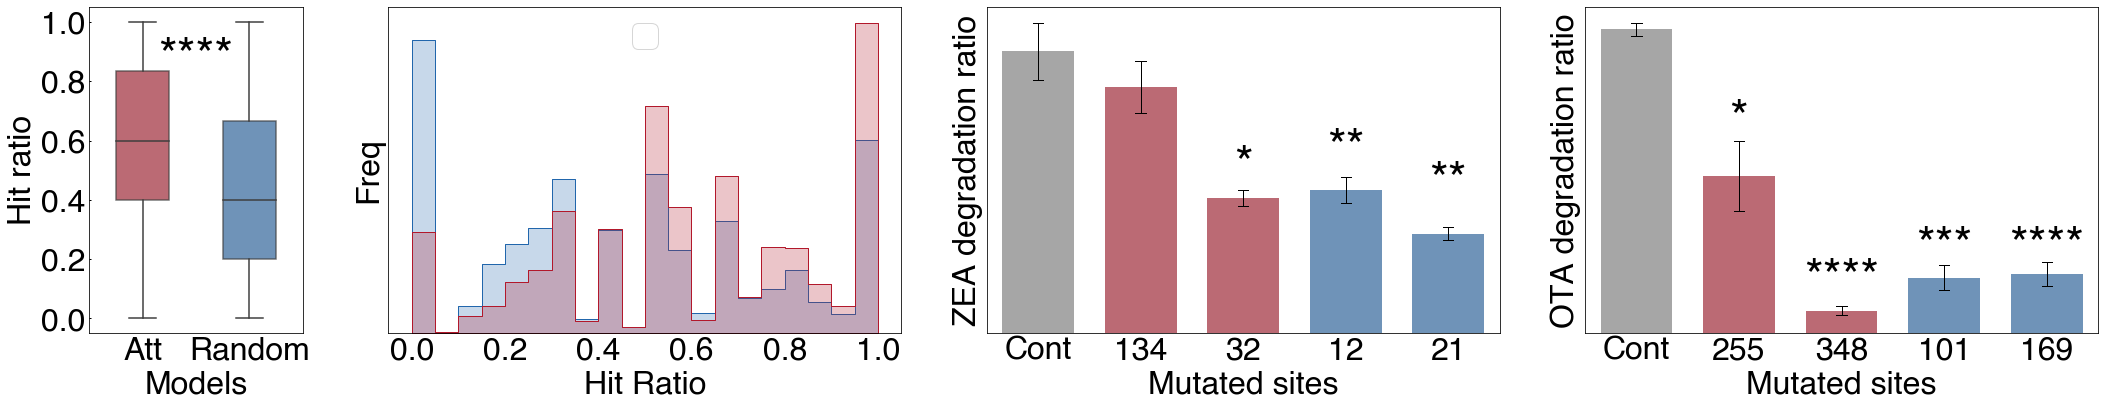

In [6]:
fig=plt.figure(figsize=(36,6))
rc('font',**{'family':'serif','serif':['Helvetica']})
gs = GridSpec(1, 7, figure=fig) 

ax1 = fig.add_subplot(gs[0, 0:1])


ax1=fig.add_subplot(gs[0, 0:1])
palette = {"Att": '#b2182b', "Random": '#2166ac'}
ax1 = sns.boxplot(data=wdf, x="Model", y="Weights", order = ["Att", "Random"],
    palette=palette, showfliers=False, linewidth=1.5, width=0.5, boxprops=dict(alpha=0.7),)  # boxprops=dict(alpha=1.0)

ax1.set(xlabel=None)

plt.yticks([0,  0.2, 0.4,0.6, 0.8,1.0], fontsize=32)

ax1.set_ylabel("Hit ratio", fontname='Helvetica', fontsize=32)
ax1.set_xlabel("Models", fontname='Helvetica', fontsize=32)


stat, p_value = scipy.stats.ttest_ind(wdf[wdf["Model"]=="Random"]["Weights"],
                                     wdf[wdf["Model"]=="Att"]["Weights"],
                                     equal_var=False)
convert_pvalue_to_asterisks(p_value)

x1, x2 = 0, 1
y,h = 0.9,.01

ax1.text((x1+x2)*.5, y-0.1,  convert_pvalue_to_asterisks(p_value), ha='center', va='bottom', color="k", fontsize=48)  # "T-test: "+
ax1.tick_params(which='major',direction='in',length=1.5,width=1.,labelsize=32,bottom=False)
# plt.xticks(rotation=15)


ax2=fig.add_subplot(gs[0, 1:3])
ax2 = sns.histplot(x='Weights',data=wdf, hue="Model", palette=palette, 
                  element="step", bins=20)
ax2.legend(frameon=True,loc='upper center', fontsize=32)

ax2.set_xlabel("Hit Ratio", fontsize=32)
ax2.set_ylabel("Freq", fontsize=32)

ax2.tick_params(which='major',direction='in',length=1.5,width=1.,labelsize=32,bottom=False)
plt.yticks([])
plt.xticks([])
plt.xticks([0,  0.2, 0.4,0.6, 0.8,1.0], fontsize=32)





ax4=fig.add_subplot(gs[0, 3:5])

palette = {"Cont": 'grey', "ZH":'grey', 
           "134": '#b2182b', "32": '#b2182b',
            '12':'#2166ac', '21':'#2166ac'}

ax4 = sns.barplot(x="Group", y="Results", data=df_, 
                 palette=palette,
                 estimator=np.mean,
                 ci="sd", 
                 capsize=.1, 
                 errwidth=1, 
                 errcolor="k",
                 alpha  = 0.7)

for bar,newwidth in zip(ax4.patches,[0.7]*7):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.
    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)

dataname = ['Cont',  '134', '32', '12', '21']
dataname = ['134', '32', '12', '21']
p_lst = []
for g in dataname:
    stat, p_value = scipy.stats.ttest_ind(df_[df_["Group"]=="Cont"]["Results"],
                                         df_[df_["Group"]==g]["Results"],
                                         equal_var=False)
    p_lst.append(convert_pvalue_to_asterisks(p_value))


y,h = df_["Results"].max()+1,1000


ax4.text(1, 70,  p_lst[0], ha='center', va='bottom', color="k", fontsize=48)  
ax4.text(2, 45,  p_lst[1], ha='center', va='bottom', color="k", fontsize=48)  
ax4.text(3, 50,  p_lst[2], ha='center', va='bottom', color="k", fontsize=48)  
ax4.text(4, 40,  p_lst[3], ha='center', va='bottom', color="k", fontsize=48) 

ax4.set_ylabel("ZEA degradation ratio", fontsize=32)
ax4.set_xlabel("", fontsize=32)
ax4.tick_params(which='major',direction='in',length=1.5, width=1.,labelsize=32, bottom=False)

ax4.set_xlabel("Mutated sites", fontname='Helvetica', fontsize=32)
plt.yticks([])
ax4.set_axisbelow(True)




ax3=fig.add_subplot(gs[0, 5:7])
palette = {"Cont": 'grey', "OH":'grey', 
           "133": '#b2182b', "255": '#b2182b', '348':'#b2182b',
            '101':'#2166ac', '169':'#2166ac'}

ax3 = sns.barplot(x="Group", y="Results", data=df, 
                 palette=palette,
                 estimator=np.mean,
                 ci="sd", 
                 capsize=.1, 
                 errwidth=1, 
                 errcolor="k",
                 alpha=0.7,
                 )
for bar,newwidth in zip(ax3.patches,[0.7]*7):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.
    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)
    
    
dataname = ['255', '348', '101', '169']

p_lst = []
for g in dataname:
    stat, p_value = scipy.stats.ttest_ind(df[df["Group"]=="Cont"]["Results"],
                                         df[df["Group"]==g]["Results"],
                                         equal_var=False)
    p_lst.append(convert_pvalue_to_asterisks(p_value))


y,h = df["Results"].max()+1,1000

ax3.text(1, 60,  p_lst[0], ha='center', va='bottom', color="k", fontsize=48)  # "T-test: "+
ax3.text(2, 10,  p_lst[1], ha='center', va='bottom', color="k", fontsize=48)  # "T-test: "+
ax3.text(3, 20,  p_lst[2], ha='center', va='bottom', color="k", fontsize=48)  # "T-test: "+
ax3.text(4, 20,  p_lst[3], ha='center', va='bottom', color="k", fontsize=48)  # "T-test: "+

ax3.tick_params(which='major',direction='in',length=1.5, width=1.,labelsize=32, bottom=False)
ax3.set_ylabel("OTA degradation ratio", fontsize=32)
ax3.set_xlabel("Mutated sites", fontname='Helvetica', fontsize=32)

ax3.set_axisbelow(True)
plt.yticks([])


fig.subplots_adjust(wspace=0.4) 
fig.subplots_adjust(hspace=0.4) 

plt.savefig("./Fig 5.png", dpi=400, bbox_inches = 'tight')

# Venn 

In [7]:
from matplotlib import pyplot as plt
from matplotlib import rc

from upsetplot import from_memberships
from upsetplot import plot
from upsetplot import generate_counts, UpSet

from matplotlib import cm
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles
import seaborn as sns


import openpyxl
import random
from scipy import stats
import scipy
import pandas as pd
import numpy as np

In [8]:
myexcel = openpyxl.load_workbook('./Data/venn.xlsx')
sheet1 = myexcel['Sheet1']
maxrow = sheet1.max_row

OTA = [
    [sheet1.cell(index+2,1).value for index in range(124)], # Attention
    [sheet1.cell(index+2,2).value for index in range(131)], # MD
    [sheet1.cell(index+2,3).value for index in range(48)], # RMSF
    [sheet1.cell(index+2,4).value for index in range(14)], # Energy
    [sheet1.cell(index+2,5).value for index in range(99)], # DCCM
]

OTA_label = ['OTA_att','OTA_MD','OTA_RMSF','OTA_energy','OTA_DCCM']

sheet2 = myexcel['Sheet2']
ZEN = [
[sheet2.cell(index+2,1).value for index in range(56)],
[sheet2.cell(index+2,2).value for index in range(161)],
[sheet2.cell(index+2,3).value for index in range(93)],
[sheet2.cell(index+2,4).value for index in range(5)],
[sheet2.cell(index+2,5).value for index in range(107)],
]

ZEN_label = ['ZEN_att','ZEN_MD','ZEN_RMSF','ZEN_energy','ZEN_DCCM']


In [9]:
#  Random residues compared with MD
np.random.seed(33)
random_OTA_residue_lst = [np.random.choice(409, 124), np.random.choice(409, 124), np.random.choice(409, 124), np.random.choice(409, 124), np.random.choice(409, 124)]

Random_com_residues_withMD_lst = []
Attention_com_residues_withMD_lst = []

only_Random_lst = []
only_MD_lst = []
only_Attention_lst = []

# three_combine_lst = []
# Attention_random_lst = []

for rOTA in random_OTA_residue_lst:

    Random_com_residues_withMD = np.intersect1d(np.array(OTA[1]), rOTA)
    Random_com_residues_withMD_lst.append(len(Random_com_residues_withMD))  # -len(three_combine)
    
    Attention_com_residues_withMD = np.intersect1d(np.array(OTA[1]), np.array(OTA[0]))
    Attention_com_residues_withMD_lst.append(len(Attention_com_residues_withMD))  # -len(three_combine)
    

    only_Random = [item for item in rOTA if item not in list(set(OTA[0] + OTA[1]))]
    only_Random_lst.append(len(only_Random))
    
    only_MD = [item for item in OTA[1] if item not in list(set(OTA[0] + list(rOTA)))]
    only_MD_lst.append(len(only_MD))
    
    only_Attention = [item for item in OTA[0] if item not in list(set(OTA[1] + list(rOTA)))]
    only_Attention_lst.append(len(only_Attention))
    
#     three_combine_tmp = np.intersect1d(np.array(OTA[1]), np.array(OTA[0]))
#     three_combine = np.intersect1d(three_combine_tmp, rOTA)
#     three_combine_lst.append(len(three_combine))
    
#     Attention_random = np.intersect1d(np.array(OTA[0]), rOTA)
#     Attention_random_lst.append(len(Attention_random))
    
    
print(Random_com_residues_withMD_lst)
print(Attention_com_residues_withMD_lst)
print(only_Random_lst)
print(only_MD_lst)
print(only_Attention_lst)
# print(Attention_random_lst)
# print(three_combine_lst)

print(np.mean(Random_com_residues_withMD_lst))
print(np.mean(Attention_com_residues_withMD_lst))
print(np.mean(only_Random_lst))
print(np.mean(only_MD_lst))
print(np.mean(only_Attention_lst))
# print(np.mean(Attention_random_lst))
# print(np.mean(three_combine_lst))

[32, 24, 26, 31, 30]
[53, 53, 53, 53, 53]
[71, 74, 63, 67, 64]
[63, 62, 62, 59, 61]
[53, 55, 46, 54, 52]
28.6
53.0
67.8
61.4
52.0


In [10]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

9.183861665050282e-05


<ipython-input-11-8c298b6c3d2a>:42: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, p_value = scipy.stats.ttest_ind(df_[df_["Group"]=="Random_MD"]["Results"],


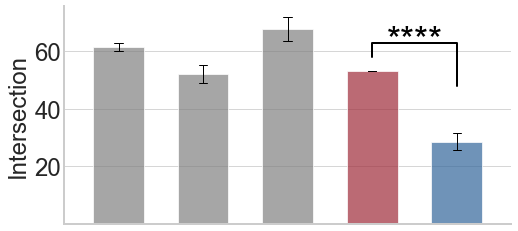

In [11]:
df1 = pd.DataFrame({"Group": ["MD"]*5, "Results": only_MD_lst })
df2 = pd.DataFrame({"Group": ["Attention"]*5, "Results": only_Attention_lst })
df3 = pd.DataFrame({"Group": ["Random"]*5, "Results": only_Random_lst })
df4 = pd.DataFrame({"Group": ["Attention_MD"]*5, "Results": Attention_com_residues_withMD_lst})
df5 = pd.DataFrame({"Group": ["Random_MD"]*5, "Results": Random_com_residues_withMD_lst })

df_ = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)   
df_.reset_index()
df_.head()


sns.set_style("whitegrid")
palette = {"Random": 'grey', 
           "MD":'grey', 
           "Attention":'grey',
           "Random_MD": '#2166ac', 
           'Attention_MD':'#b2182b',
          }

fig = plt.figure(figsize=(8, 4))
fig = sns.barplot(x="Group", y="Results", data=df_, 
                 palette=palette,
                 estimator=np.mean,
                 ci="sd", 
                 capsize=.1, 
                 errwidth=1, 
                 errcolor="k",
                 alpha  = 0.7)


for bar,newwidth in zip(fig.patches,[0.6]*5):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.
    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)

    
dataname = ['Attention_MD',]
p_lst = []
for g in dataname:
    stat, p_value = scipy.stats.ttest_ind(df_[df_["Group"]=="Random_MD"]["Results"],
                                         df_[df_["Group"]==g]["Results"],
                                         equal_var=False)
    print(p_value)
    p_lst.append(convert_pvalue_to_asterisks(p_value))


x1, x2 = 3, 4
y,h = 58, 5
fig.plot([x1, x1, x2, x2], [y, y+h, y+h, y-h-h], lw=2, c="k")

y,h = df_["Results"].max()+1,1

fig.text(3.5, 58,  p_lst[0], ha='center', va='bottom', color="k", fontsize=36)  # "T-test: "+

fig.set_ylabel("Intersection", fontsize=24)
fig.set_xticks([])
fig.set_xlabel("", fontsize=24)
fig.tick_params(which='major',direction='in',length=1.5, width=1.,labelsize=24, bottom=False)

fig.spines['bottom'].set_linewidth(2)
fig.spines['left'].set_linewidth(2)
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
# fig.spines['bottom'].set_visible(False)
# fig.spines['left'].set_visible(False)

plt.yticks([20, 40, 60], fontsize=24)
fig.set_axisbelow(True)
plt.savefig("./upsetplot_OTA.png", dpi=400, bbox_inches = 'tight')

In [12]:
np.random.seed(33)
random_ZEN_residue_lst = [np.random.choice(264, 56), np.random.choice(264, 56), np.random.choice(264, 56), np.random.choice(264, 56), np.random.choice(264, 56)]

Random_com_residues_withMD_lst = []
Attention_com_residues_withMD_lst = []
only_Random_lst = []
only_MD_lst = []
only_Attention_lst = []


for rZEN in random_ZEN_residue_lst:
    Random_com_residues_withMD = np.intersect1d(np.array(ZEN[1]), rZEN)
    Random_com_residues_withMD_lst.append(len(Random_com_residues_withMD))
    
    Attention_com_residues_withMD = np.intersect1d(np.array(ZEN[1]), np.array(ZEN[0]))
    Attention_com_residues_withMD_lst.append(len(Attention_com_residues_withMD))
    
    only_Random = [item for item in rZEN if item not in list(set(ZEN[0] + ZEN[1]))]
    only_Random_lst.append(len(only_Random))
    
    only_MD = [item for item in ZEN[1] if item not in list(set(ZEN[0] + list(rZEN)))]
    only_MD_lst.append(len(only_MD))
    
    only_Attention = [item for item in ZEN[0] if item not in list(set(ZEN[1] + list(rZEN)))]
    only_Attention_lst.append(len(only_Attention))
    

print(Random_com_residues_withMD_lst)
print(Attention_com_residues_withMD_lst)
print(only_Random_lst)
print(only_MD_lst)
print(only_Attention_lst)

print(np.mean(Random_com_residues_withMD_lst))
print(np.mean(Attention_com_residues_withMD_lst))
print(np.mean(only_Random_lst))
print(np.mean(only_MD_lst))
print(np.mean(only_Attention_lst))


[35, 31, 25, 33, 32]
[50, 50, 50, 50, 50]
[18, 20, 27, 21, 23]
[91, 92, 89, 87, 89]
[5, 4, 5, 5, 6]
31.2
50.0
21.8
89.6
5.0


0.0003674877516933227


<ipython-input-13-7ba7847be459>:42: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, p_value = scipy.stats.ttest_ind(df_[df_["Group"]=="Random_MD"]["Results"],


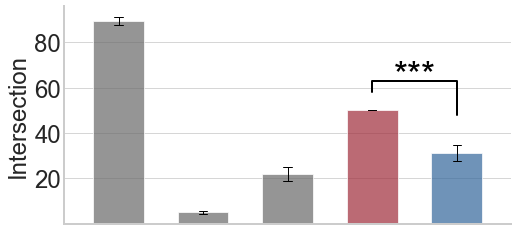

In [13]:
df1 = pd.DataFrame({"Group": ["MD"]*5, "Results": only_MD_lst })
df2 = pd.DataFrame({"Group": ["Attention"]*5, "Results": only_Attention_lst })
df3 = pd.DataFrame({"Group": ["Random"]*5, "Results": only_Random_lst })
df4 = pd.DataFrame({"Group": ["Attention_MD"]*5, "Results": Attention_com_residues_withMD_lst})
df5 = pd.DataFrame({"Group": ["Random_MD"]*5, "Results": Random_com_residues_withMD_lst })

df_ = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)   
df_.reset_index()
df_.head()


sns.set_style("whitegrid")
palette = {"Random": 'dimgrey', "MD":'dimgrey', "Attention":'dimgrey',
           "Random_MD": '#2166ac', 
            'Attention_MD':'#b2182b', }


fig = plt.figure(figsize=(8, 4))


fig = sns.barplot(x="Group", y="Results", data=df_, 
                 palette=palette,
                 estimator=np.mean,
                 ci="sd", 
                 capsize=.1, 
                 errwidth=1, 
                 errcolor="k",
                 alpha  = 0.7,
                  
                 )
for bar,newwidth in zip(fig.patches,[0.6]*5):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.
    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)

dataname = ['Attention_MD',]

p_lst = []
for g in dataname:
    stat, p_value = scipy.stats.ttest_ind(df_[df_["Group"]=="Random_MD"]["Results"],
                                         df_[df_["Group"]==g]["Results"],
                                         equal_var=False)
    print(p_value)
    p_lst.append(convert_pvalue_to_asterisks(p_value))


x1, x2 = 3, 4
y,h = 58, 5
fig.plot([x1, x1, x2, x2], [y, y+h, y+h, y-h-h], lw=2, c="k")

y,h = df_["Results"].max()+1,1
fig.text(3.5, 58,  p_lst[0], ha='center', va='bottom', color="k", fontsize=36)  # "T-test: "+
fig.set_ylabel("Intersection", fontsize=24)
fig.set_xticks([])
fig.set_xlabel("", fontsize=24)
fig.tick_params(which='major',direction='in',length=1.5, width=1.,labelsize=24, bottom=False)


fig.spines['bottom'].set_linewidth(2)
fig.spines['left'].set_linewidth(2)
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
# fig.spines['bottom'].set_visible(False)
# fig.spines['left'].set_visible(False)

plt.yticks([20, 40, 60, 80], fontsize=24)
fig.set_axisbelow(True)
plt.savefig("./upsetplot_ZEN.png", dpi=400, bbox_inches = 'tight')


### The rest of sub-graphs in Fig 5 were made by ProDy (http://prody.csb.pitt.edu/) and PyMol (https://pymol.org/) according to original data (venn.xlsx)